In [1]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

In [2]:
def generate_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
    y = A * np.exp(-sigma * t) * np.sin(omega * t)
    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 35
    return y + error

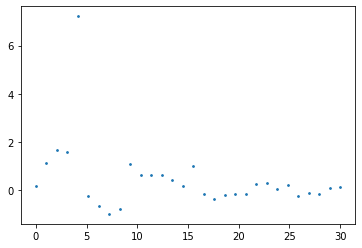

In [3]:
A = 2
sigma = 0.1
omega = 0.1 * 2 * np.pi
x_true = np.array([A, sigma, omega])

noise = 0.1

t_min = 0
t_max = 30

t_train = np.linspace(t_min, t_max, 30)
y_train = generate_data(t_train, A, sigma, omega, noise=noise, n_outliers=4)

plt.scatter(t_train, y_train, s=3)
plt.show()

In [4]:
def residual(coeff, t, y):
    return coeff[0] * np.exp(-coeff[1] * t) * np.sin(coeff[2] * t) - y

x0 = np.ones(3) # initial guess for coeff

res_robust = least_squares(residual, x0, loss='soft_l1', f_scale=0.1, args=(t_train, y_train))
res_robust.x

array([2.17468132, 0.10381258, 0.62766599])

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html

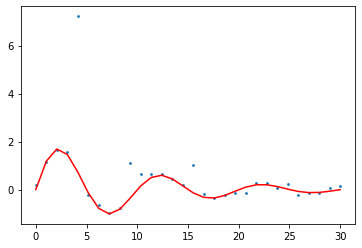

In [5]:
y_predict = generate_data(t_train, *res_robust.x)

plt.scatter(t_train, y_train, s=3)
plt.plot(t_train, y_predict, label = 'robust lsq', c = 'r')

plt.legend()
plt.show()